# Semi-classical Radiation Reaction model

Numerical integration of average energy of electron beam in field of laser pulse.

Example: Ridgers et al 2017 https://arxiv.org/pdf/1708.04511.pdf

In [13]:
# numpy
import numpy as np
from numpy import log, log10, sin, cos, exp, sqrt, tan, pi, heaviside
# import functions
from scipy.special import kv, iv, erf
from scipy.integrate import quad
from scipy import interpolate
from scipy.integrate import odeint
# physical constants
from scipy.constants import c, alpha, hbar, e
from scipy.constants import electron_mass, elementary_charge, speed_of_light
from scipy.constants import c, m_e, e, epsilon_0 # physical constants
m_eV = electron_mass * speed_of_light**2 / elementary_charge; # electron mass [eV]
m = m_eV*1e-9; #[GeV] = 0.5109989461e-3
# root finding
from scipy.optimize import fsolve
from scipy import optimize
# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
# progress bar
from tqdm.notebook import tqdm
from tqdm import trange
from time import sleep
# h5py
import h5py
# os
import os
# glob
import glob

In [2]:
def gaunt(chi):
    """
        input: chi
        output: gaunt(chi)
    """
    return (1+4.8*(1+chi)*log(1+1.7*chi)+2.44*chi**2)**(-2/3) #Baier approximation
    #(9*sqrt(3))/(8*pi) * quad( lambda u: ((2 * u**2 * kv(5/3, u))/(2 + 3 *chi*u)**2 + (36 * chi**2 * u**3 * kv(2/3, u) )/(2 + 3*chi*u)**4), 0, np.inf)[0]
gaunt = np.vectorize(gaunt)

def get_PW_gF_gaunt(g0, a0, lbd, tau0):
    """
        g0[] initial electron energy
        a0[] laser vector potential
        lbd[m] laser central wavelength
        tau0[s] pulse duration as in Vranic2014PRL
        theta[] defined as theta=0 is frontal collision

        gf[] final electron energy, corrected with gaunt factor
    """
    lbd = 0.8e-6;
    theta = 0;
    eta = 0.375; # sin^2 temporal profile

    omega0 = 2*pi*c/lbd; #[1/s] laser frequency

    #[] CRR k factor from equation 3
    k = 1/(4*pi*epsilon_0) * (1 - cos(pi-theta))**2 * eta/3 * (e**2 * omega0**2)/(m_e * c**3) * a0**2 * tau0;

    w_p = 2*pi*c/(lbd) # laser frequency
    ES = m_e**2*c**3/(e*hbar) # Schwinger field
    Eref = m_e*c*w_p/e # normalizing field
    aS = ES/Eref # normalized Schwinger field
    chi = 2*g0*a0/aS
    
    return g0 / (1 + gaunt(chi) * k * g0)

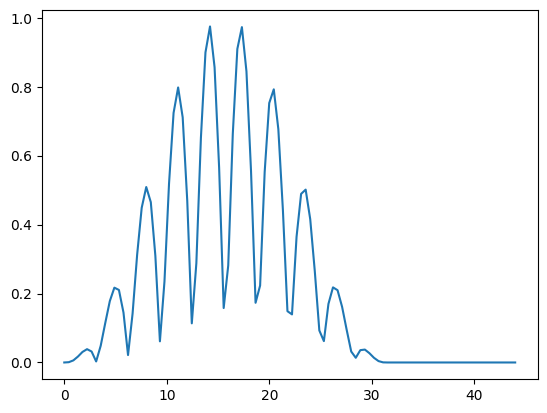

In [3]:
def aphi(phi, n):
    return np.abs( sin(phi/n)**2 * sin(phi) ) * np.heaviside(n*pi-phi,0)
    #return sin(phi)**2 * sin(n*phi) * np.heaviside(pi-phi,0)

n = 10
philst = np.linspace(0, pi*n*1.4,100)
plt.plot(philst, aphi(philst, n) )
plt.show()

In [14]:
# retrieve data from osiris files
files_electrons = glob.glob('a03g5000t50/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a03g5000t50 = np.zeros(len(files_electrons))
gsig_a03g5000t50 = np.zeros(len(files_electrons))
#
for i in trange(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a03g5000t50[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a03g5000t50[i] = sqrt( np.sum( (enedist-gavg_a03g5000t50[i])**2 * qdist)/np.sum(qdist) )


files_electrons = glob.glob('a06g5000t50/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a06g5000t50 = np.zeros(len(files_electrons))
gsig_a06g5000t50 = np.zeros(len(files_electrons))
#
for i in trange(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a06g5000t50[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a06g5000t50[i] = sqrt( np.sum( (enedist-gavg_a06g5000t50[i])**2 * qdist)/np.sum(qdist) )


files_electrons = glob.glob('a12g2000t50/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a12g2000t50 = np.zeros(len(files_electrons))
gsig_a12g2000t50 = np.zeros(len(files_electrons))
#
for i in trange(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a12g2000t50[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a12g2000t50[i] = sqrt( np.sum( (enedist-gavg_a12g2000t50[i])**2 * qdist)/np.sum(qdist) )


files_electrons = glob.glob('a12g5000t50/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a12g5000t50 = np.zeros(len(files_electrons))
gsig_a12g5000t50 = np.zeros(len(files_electrons))
#
for i in trange(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a12g5000t50[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a12g5000t50[i] = sqrt( np.sum( (enedist-gavg_a12g5000t50[i])**2 * qdist)/np.sum(qdist) )



files_electrons = glob.glob('a12g5000t70/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a12g5000t70 = np.zeros(len(files_electrons))
gsig_a12g5000t70 = np.zeros(len(files_electrons))
#
for i in trange(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a12g5000t70[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a12g5000t70[i] = sqrt( np.sum( (enedist-gavg_a12g5000t70[i])**2 * qdist)/np.sum(qdist) )

100%|████████████████████████████████████████| 104/104 [00:00<00:00, 486.57it/s]


In [15]:
lbd = 0.8e-6; #[\mu m]
w_p = 2*pi*c/(lbd) # laser frequency
ES = m_e**2*c**3/(e*hbar) # Schwinger field
Eref = m_e*c*w_p/e # normalizing field
aS = ES/Eref # normalized Schwinger field
lbdc = hbar/(m_e*c); # Compton wavelength

def dgdt(g, t, a0, T, n):
    """
        derivative dg/dt
    """
    phi = t*2/pi #*n*pi

    a = np.abs( a0 * sin(phi/n)**2 * sin(phi) ) * np.heaviside(n*pi-phi,0)
    eta = 2*g*a/aS
    
    dpdt = -2/3 * alpha * 1/lbdc * m_e*c**2 * eta**2

    return gaunt(eta) * dpdt/(m_e*c) * T /4.9 # 

def goft(a0, g0, tau_osiris):
    """
        g(t), returns [t,g(t)] arrays
    """
    
    t_osiris = np.linspace(0, 70, 201)
    
    tau = tau_osiris/w_p; #[fs]
    T = lbd/c; #[s]
    n = tau/T; #[]
    
    sol = odeint(dgdt, g0, t_osiris, args=(a0, T, n) )

    return t_osiris, sol

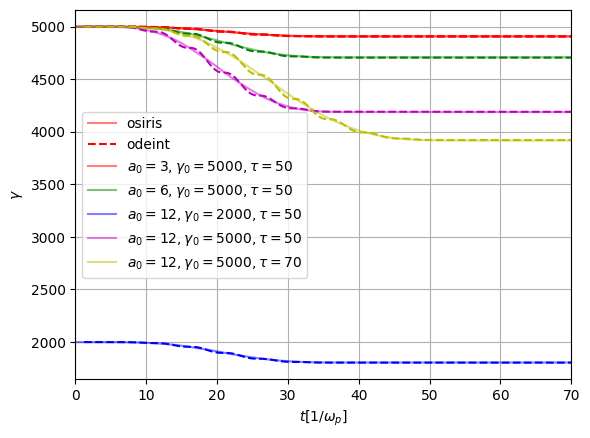

In [16]:
alp = 0.5
plt.plot(gavg_a03g5000t50, 'r', label=r'osiris', alpha=alp)
x0 = 2.5/2
x, y = goft(a0=3, g0=5000, tau_osiris=50)
plt.plot(x+x0, y, 'r--', label=r'odeint')

plt.plot(gavg_a03g5000t50, 'r', label=r'$a_0=3,\gamma_0=5000,\tau=50$', alpha=alp)
plt.plot(gavg_a06g5000t50, 'g', label=r'$a_0=6,\gamma_0=5000,\tau=50$', alpha=alp)
plt.plot(gavg_a12g2000t50, 'b', label=r'$a_0=12,\gamma_0=2000,\tau=50$', alpha=alp)
plt.plot(gavg_a12g5000t50, 'm', label=r'$a_0=12,\gamma_0=5000,\tau=50$', alpha=alp)
plt.plot(gavg_a12g5000t70, 'y', label=r'$a_0=12,\gamma_0=5000,\tau=70$', alpha=alp)

x0 = 2.5/2
x, y = goft(a0=3, g0=5000, tau_osiris=50)
plt.plot(x+x0, y, 'r--')

x, y = goft(a0=6, g0=5000, tau_osiris=50)
plt.plot(x+x0, y, 'g--')

x, y = goft(a0=12, g0=2000, tau_osiris=50)
plt.plot(x+x0, y, 'b--')

x, y = goft(a0=12, g0=5000, tau_osiris=50)
plt.plot(x+x0, y, 'm--')

x, y = goft(a0=12, g0=5000, tau_osiris=70)
plt.plot(x+x0, y, 'y--')

plt.xlabel('t[1/wp]')
plt.legend(loc='best')
plt.xlim([0,70])
#plt.yscale('log')
#plt.ylim([3800,5100])
plt.xlabel(r'$t[1/\omega_p]$')
plt.ylabel(r'$\gamma$')
plt.grid()
plt.show()